In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [5]:
df = pd.read_csv('MovieRecommendations.csv')
df.head()

,title,rating,numOfRatings,FirstMovieRecommendation,SecondMovieRecommendation,ThirdMovieRecommendation,FourthMovieRecommendation
0,'Til There Was You (1997),2.333333,9,Primal Fear (1996),Indiana Jones and the Last Crusade (1989),"Edge, The (1997)",Beautiful Girls (1996)
1,1-900 (1994),2.600000,5,"Full Monty, The (1997)","Crow, The (1994)","Ice Storm, The (1997)",Hoop Dreams (1994)
2,101 Dalmatians (1996),2.908257,109,Murder at 1600 (1997),Miracle on 34th Street (1994),Being There (1979),"Remains of the Day, The (1993)"
3,12 Angry Men (1957),4.344000,125,Ulee's Gold (1997),Rear Window (1954),Seven Years in Tibet (1997),Clerks (1994)
4,187 (1997),3.024390,41,Maverick (1994),Conan the Barbarian (1981),"Magnificent Seven, The (1954)",Cool Hand Luke (1967)


In [6]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1664 entries, 0 to 1663
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   title                      1664 non-null   object 
 1   rating                     1664 non-null   float64
 2   numOfRatings               1664 non-null   int64  
 3   FirstMovieRecommendation   1664 non-null   object 
 4   SecondMovieRecommendation  1664 non-null   object 
 5   ThirdMovieRecommendation   1664 non-null   object 
 6   FourthMovieRecommendation  1664 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 91.1+ KB
None
            rating  numOfRatings
count  1664.000000   1664.000000
mean      3.077010     60.097957
std       0.780411     80.963482
min       1.000000      1.000000
25%       2.665094      7.000000
50%       3.162132     27.000000
75%       3.651808     80.250000
max       5.000000    584.000000


In [7]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()


title
'Til There Was You (1997)    1
1-900 (1994)                 1
101 Dalmatians (1996)        1
12 Angry Men (1957)          1
187 (1997)                   1
Name: rating, dtype: int64

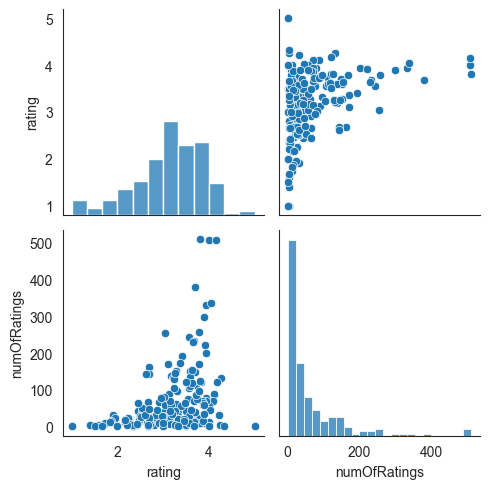

In [8]:
sns.pairplot(df.sample(min(200, len(df))), height=2.5)
plt.tight_layout()


Text(0, 0.5, 'Count')

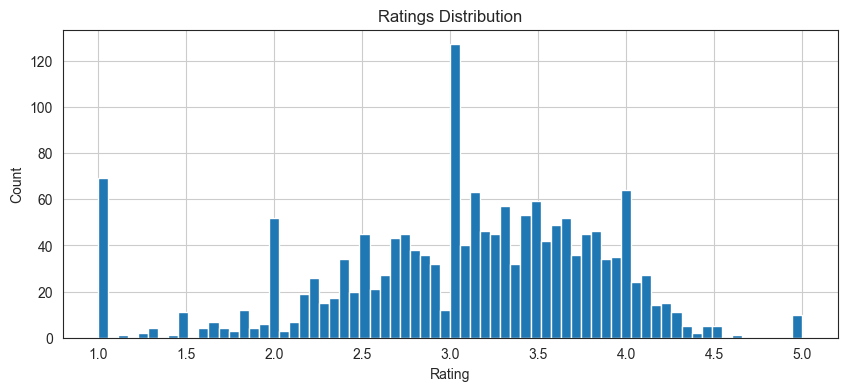

In [9]:
plt.figure(figsize=(10, 4))
df['rating'].hist(bins=70)
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')

Skewness: -0.702004
Kurtosis: 0.467365


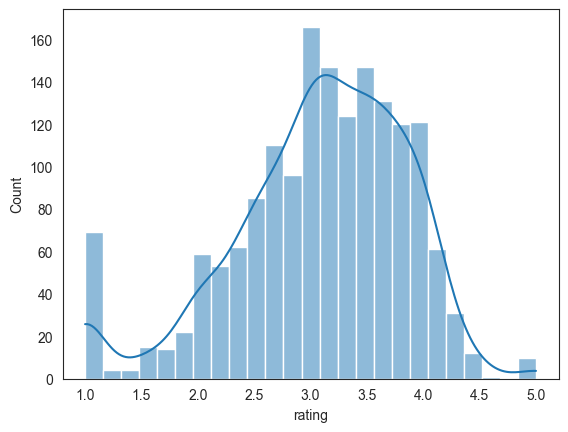

In [10]:
sns.histplot(df['rating'], kde=True)
print("Skewness: %f" % df['rating'].skew())
print("Kurtosis: %f" % df['rating'].kurt())

Text(0.5, 1.0, 'Rating vs Number of Ratings')

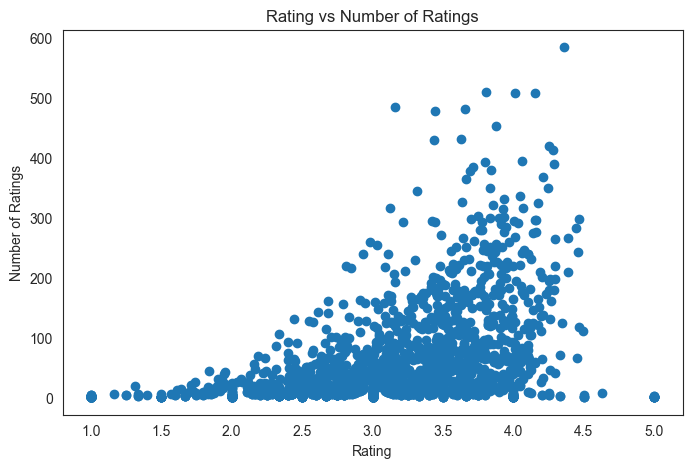

In [11]:
plt.figure(figsize=(8, 5))
plt.scatter(x=df['rating'], y=df['numOfRatings'])
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.title('Rating vs Number of Ratings')


 mu = 60.10 and sigma = 80.94



Text(0.5, 1.0, 'numOfRatings Distribution')

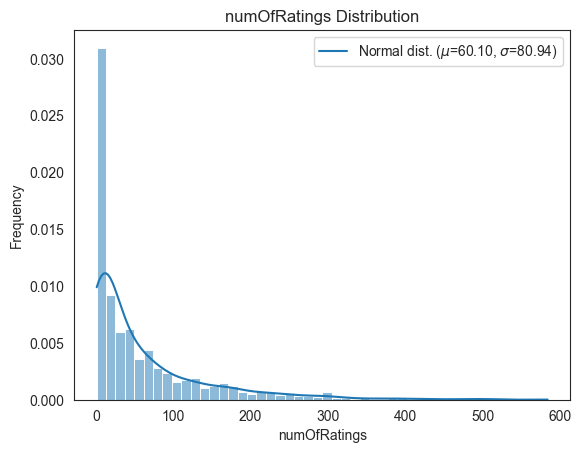

In [12]:
from scipy import stats
from scipy.stats import norm

sns.histplot(df['numOfRatings'], kde=True, stat="density")
(mu, sigma) = norm.fit(df['numOfRatings'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend([f'Normal dist. ($\\mu$={mu:.2f}, $\\sigma$={sigma:.2f})'], loc='best')
plt.ylabel('Frequency')
plt.title('numOfRatings Distribution')


Text(0.5, 1.0, 'Probability Plot')

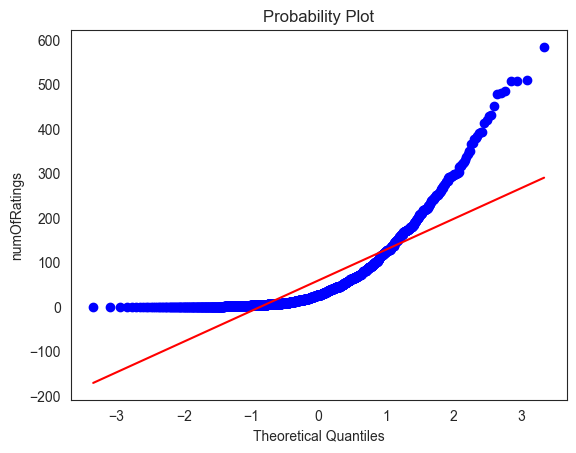

In [13]:
fig = plt.figure()
res = stats.probplot(df['numOfRatings'], plot=plt)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('numOfRatings')
plt.title('Probability Plot')


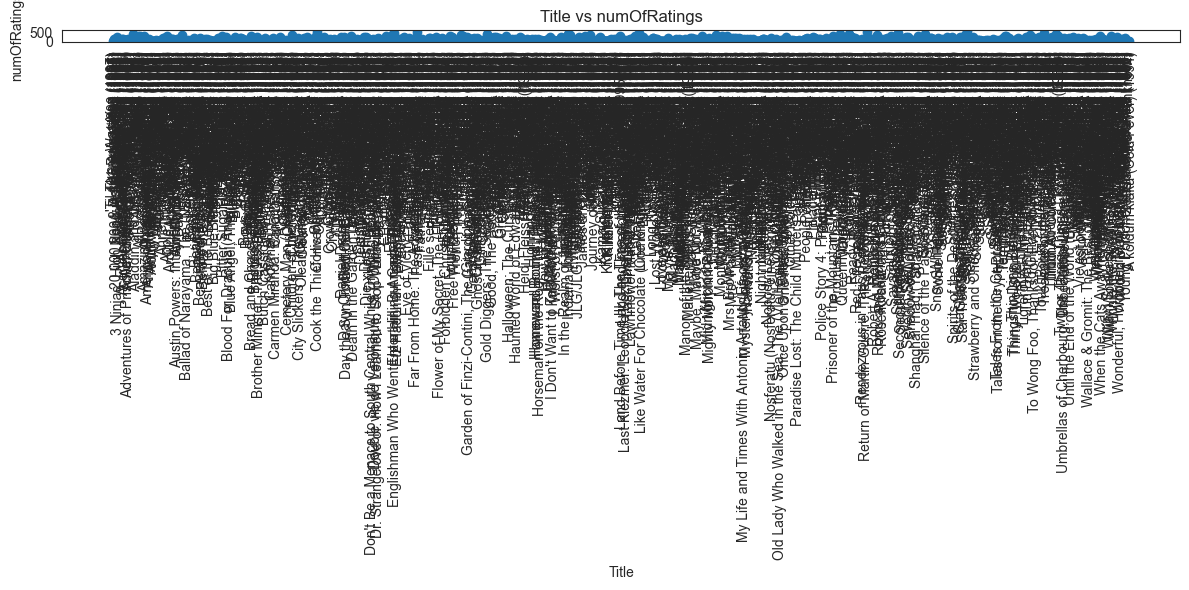

In [18]:
plt.figure(figsize=(12, 6))
plt.scatter(x=df['title'], y=df['numOfRatings'])
plt.xticks(rotation=90)
plt.ylabel('numOfRatings')
plt.xlabel('Title')
plt.title('Title vs numOfRatings')
plt.tight_layout()
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

x = df.drop("numOfRatings", axis=1)
y = df["numOfRatings"]

# Drop non-numeric columns before splitting
x = x.select_dtypes(include=[np.number])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1331, 1)
(333, 1)
(1331,)
(333,)


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train Linear Regression
lr = LinearRegression()
lr.fit(x_train, y_train)

# Make predictions
y_pred = lr.predict(x_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Combine Actual vs Predicted in a DataFrame
results = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
results['Difference'] = results['Actual'] - results['Predicted']

# Display results
print("Root Mean Squared Error (RMSE):", rmse)
print("\nActual vs Predicted values:\n")
print(results.head(20))  # showing first 20 rows


Root Mean Squared Error (RMSE): 73.89756978617275

Actual vs Predicted values:

    Actual   Predicted  Difference
0        1   57.116753  -56.116753
1       14    4.018650    9.981350
2        3   72.603699  -69.603699
3      246  107.166031  138.833969
4        2  -12.574507   14.574507
5       11   57.116753  -46.116753
6       67  124.380954  -57.380954
7       49   29.619521   19.380479
8      112   90.717896   21.282104
9       20   31.563291  -11.563291
10     127   63.701754   63.298246
11     126   86.984435   39.015565
12     148   94.473779   53.526221
13      27   -1.389490   28.389490
14      50  104.506809  -54.506809
15     256   97.769988  158.230012
16      69   55.770062   13.229938
17      48   18.399386   29.600614
18       1  -35.804927   36.804927
19     104   68.285224   35.714776
